# Hoja de Trabajo 3 - Árboles de decisión

In [47]:
# Librerias
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.cluster as cluster
import sklearn.metrics as skm
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random


In [4]:
# General functions
def calculate_frecuency(data, column, index='index'):
    data_f = pd.DataFrame({
        'frecuency': data[column].value_counts(),
        'relative_frecuency (%)': data[column].value_counts(normalize=True)*100,
        'relative_acc_frecuency': data[column].value_counts(normalize=True).cumsum()
    })
    data_f.reset_index(level=[0], inplace=True)
    data_f.rename(columns={index:column}, inplace=True)
    left_aligned_df = data_f.style.set_properties(**{'text-align': 'center'}) 
    display(left_aligned_df)
    return data_f

# Extraido de: https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)

# Semilla para garantizar que los resultados puedan ser repetibles
random.seed(123)

In [5]:
# General variables
cuantitative = [
    'LotFrontage',
    'LotArea',
    'MiscVal',
	'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'GarageArea',
    'GrLivArea',
    'LowQualFinSF',
    '2ndFlrSF',
    '1stFlrSF',
    'TotalBsmtSF',
    'BsmtUnfSF',
    'BsmtFinSF2',
    'BsmtFinSF1',
    'MasVnrArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'SalePrice'
]

## Exploración y preprocesamiento de los datos
Análisis exploratorio de los datos para obtener un mejor conocimiento sobre los mismos y su distribución. Se trabajará con un set de datos proporcionado por Kaggle denominado House Prices: Advance Regression Techniques el cual cuenta con # observaciones y # variables.

### Conociendo las variables
#### Cualitativas ordinales
- **LotShape:** General shape of the property
- **LandContour:** Flatness of the property
- **LandSlope:** Slope of the property
- **BldgType:** Type of dwelling
- **OverallQual:** Rates the overall material and finish of the house
- **OverallCond:** Rates the overall condition of the house
- **ExterQual:** Evaluates the quality of the material on the exterior
- **ExterCond:** Evaluates the present condition of the material on the exterior
- **BsmtQual:** Evaluates the height of the basement
- **BsmtCond:** Evaluates the general conditions of the basement
- **BsmtExposure:** Refers to walkout or garden level walls
- **BsmtFinType1:** Rating of basement finished area
- **BsmtFinType2:** Rating of basement finished area (if multiple types)
- **HeatingQC:** Heating quality and condition
- **KitchenQual:** Kitchen quality
- **FireplaceQu:** Fireplace qualityt
- **GarageFinish:** Interior finish of the garage 
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PoolQC:** Pool quality
- **Fence:** Fence quality

#### Cualitativas nominales
- **MSSubclass:** identifies the type of dwelling involved in the sale
- **MSZoning:** Identifies the general zoning clasification of hte sale
- **Street:** Type of road access to property
- **Alley:** Type of alley access to property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to various conditions
- **Condition2:** Proximity to various conditions
- **HouseStyle:** Style of dwelling*
- **RoofStyle:** Type of roop
- **RoofMatl:** roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house 
- **MasVnrType:** Masonry veneer type
- **Foundation:** Type of foundation
- **Heating:** Type of heating
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **Functional:** Home functionality*
- **GarageType:** Garage location
- **PavedDrive:** Paved driveway*
- **MiscFeature:** Miscellaneous feature not covered in other categories
- **MoSold:** Month sold
- **YrSold:** Year sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

#### Cuantitativas Contínuas
- MasVnrArea

#### Cuantitativas Discretas
- MSSubClass
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- LotArea
- SalePrice

In [7]:
train = pd.read_csv("./train.csv")
head = train.head()
head_f = head.style.set_properties(**{'text-align': 'center'}) 
display(head_f)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


### Exploración de variables cualitativas

#### ¿Cuál es el estilo de vivienda predominante?
Es estilo de vivienda predominante o el que más se ha vendido según los datos de entrenamiento son aquellas casa de 1 piso estilo 1946 y más pisos con diferentes estilos.

In [8]:
calculate_frecuency(train, 'MSSubClass')

,MSSubClass,frecuency,relative_frecuency (%),relative_acc_frecuency
0,20,536,36.712329,0.367123
1,60,299,20.479452,0.571918
2,50,144,9.863014,0.670548
3,120,87,5.958904,0.730137
4,30,69,4.726027,0.777397
5,160,63,4.315068,0.820548
6,70,60,4.109589,0.861644
7,80,58,3.972603,0.901370
8,90,52,3.561644,0.936986
9,190,30,2.054795,0.957534


,MSSubClass,frecuency,relative_frecuency (%),relative_acc_frecuency
0,20,536,36.712329,0.367123
1,60,299,20.479452,0.571918
2,50,144,9.863014,0.670548
3,120,87,5.958904,0.730137
4,30,69,4.726027,0.777397
5,160,63,4.315068,0.820548
6,70,60,4.109589,0.861644
7,80,58,3.972603,0.901370
8,90,52,3.561644,0.936986
9,190,30,2.054795,0.957534


#### ¿En qué zona se encuentran las casas más vendidas?
Las zonas en las cuales se encuentran las casas más vendidas son en residenciales con baja densidad. Algo interesante es que no existen casas en zonas industriales o de agricultura.

In [9]:
zoning = calculate_frecuency(train, 'MSZoning')
del zoning

,MSZoning,frecuency,relative_frecuency (%),relative_acc_frecuency
0,RL,1151,78.835616,0.788356
1,RM,218,14.931507,0.937671
2,FV,65,4.452055,0.982192
3,RH,16,1.095890,0.993151
4,C (all),10,0.684932,1.000000


#### ¿Son mayores las ventas si el tipo de vía de acceso a la propiedad es pavimentado?
Sí son mayores las ventas con la vía de acceso pavimentada. De hecho, el 99.5% de las casa vendidas, en los datos de entrenamiento, tienen acceso pavimentado.

In [10]:
street = calculate_frecuency(train, 'Street')
del street

,Street,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Pave,1454,99.589041,0.995890
1,Grvl,6,0.410959,1.000000


#### Predominan las casas con todo tipo de utilidades públicas
El 99.93% de casas cuentan con todo tipo de utilidades públicas, las cuales incluyen, electricidad, gas, agua y tanque séptico.

In [11]:
utilities = calculate_frecuency(train, 'Utilities')
del utilities

,Utilities,frecuency,relative_frecuency (%),relative_acc_frecuency
0,AllPub,1459,99.931507,0.999315
1,NoSeWa,1,0.068493,1.000000


#### ¿La mayor cantidad de casas que se venden se encuentran en excelente estado?
No, las casas que más se venden son las que se encuentran en un estado promedio, aquellas que no están ni excelente pero tampoco mal. Y estás representan un 56% de las ventas totales.

,OverallCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,5,821,56.232877,0.562329
1,6,252,17.260274,0.734932
2,7,205,14.041096,0.875342
3,8,72,4.931507,0.924658
4,4,57,3.904110,0.963699
5,3,25,1.712329,0.980822
6,9,22,1.506849,0.995890
7,2,5,0.342466,0.999315
8,1,1,0.068493,1.000000


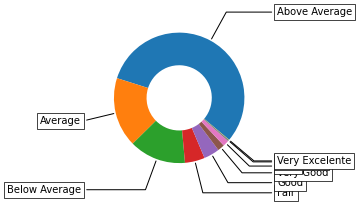

In [12]:
overall = calculate_frecuency(train, 'OverallCond')
# giving the numbers a cualitative meaning
overall['OverallCond'] = overall['OverallCond'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Very Excelente', 'Excelente', 'Very Good', 'Good', 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor']) 

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(overall['frecuency'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(overall['OverallCond'][i], xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()


#### ¿Las personas prefieren casas fundidas en concreto vertido?
Sí, al menos un 44% de las prefieren las casas de cemento vertido, sin embargo, un 43% prefieren las casas de bloques de cemento.

In [13]:
foundation = calculate_frecuency(train, 'Foundation')
del foundation

,Foundation,frecuency,relative_frecuency (%),relative_acc_frecuency
0,PConc,647,44.315068,0.443151
1,CBlock,634,43.424658,0.877397
2,BrkTil,146,10.000000,0.977397
3,Slab,24,1.643836,0.993836
4,Stone,6,0.410959,0.997945
5,Wood,3,0.205479,1.000000


#### Las casas con sótanos de al menos 100 pulgadas de altura son las más vendidas
No, las casa más vendidas son aquellas que tienen sótanos promedio, aproximadamente entre las 80-89 pulgadas.

In [14]:
bsmt = calculate_frecuency(train, 'BsmtQual')
del bsmt

,BsmtQual,frecuency,relative_frecuency (%),relative_acc_frecuency
0,TA,649,45.607871,0.456079
1,Gd,618,43.429375,0.890372
2,Ex,121,8.503162,0.975404
3,Fa,35,2.459592,1.000000


#### La mayoría de viviendas cuentan con un sistema de aire acondicionado central y calefacción en buena calidad
Al menos un 96% de las viviendas cuentan con calefacción en condiciones promedio y un 93.5% cuenta con aire acondicionado central

In [15]:
heating = calculate_frecuency(train, 'HeatingQC')
del heating

,HeatingQC,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Ex,741,50.753425,0.507534
1,TA,428,29.315068,0.800685
2,Gd,241,16.506849,0.965753
3,Fa,49,3.356164,0.999315
4,Po,1,0.068493,1.000000


In [16]:
central = calculate_frecuency(train, 'CentralAir')
del central

,CentralAir,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Y,1365,93.493151,0.934932
1,N,95,6.506849,1.000000


#### Al menos un 50% de las viviendas cuenta con garage en buenas condiciones
Un 96% de los garages de las viviendas se encuentran en condiciones promedio, y solo apenas un 0.802 tiene garage en buenas condiciones

In [17]:
garage_cond = calculate_frecuency(train, 'GarageCond')
del garage_cond

,GarageCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,TA,1326,96.156635,0.961566
1,Fa,35,2.538071,0.986947
2,Gd,9,0.652647,0.993474
3,Po,7,0.507614,0.998550
4,Ex,2,0.145033,1.000000


#### ¿Cuál es el año predominante de construcción de vivienda? ¿Las casas más antiguas son las más vendidas?

In [19]:
year = calculate_frecuency(train, 'YearBuilt')
del year

,YearBuilt,frecuency,relative_frecuency (%),relative_acc_frecuency
0,2006,67,4.589041,0.045890
1,2005,64,4.383562,0.089726
2,2004,54,3.698630,0.126712
3,2007,49,3.356164,0.160274
4,2003,45,3.082192,0.191096
5,1976,33,2.260274,0.213699
6,1977,32,2.191781,0.235616
7,1920,30,2.054795,0.256164
8,1959,26,1.780822,0.273973
9,1998,25,1.712329,0.291096


#### ¿Cuáles son los precios más altos por los cuales se ha vendido una casa?
De acuerdo con los resultados obtenidos se sabe que el rango de precios en el que están las casas con los precios más altos es de 755000 hasta 485000.

In [ ]:
sale_prices  = calculate_frecuency(train, 'SalePrice')
del sale_prices

,SalePrice,frecuency,relative_frecuency (%),relative_acc_frecuency
0,140000,20,1.369863,0.013699
1,135000,17,1.164384,0.025342
2,155000,14,0.958904,0.034932
3,145000,14,0.958904,0.044521
4,190000,13,0.890411,0.053425
5,110000,13,0.890411,0.062329
6,115000,12,0.821918,0.070548
7,160000,12,0.821918,0.078767
8,130000,11,0.753425,0.086301
9,139000,11,0.753425,0.093836


### Distribución de las variables

In [20]:
def is_normal(column, tolerancia=0.05):
    return sp.normaltest(column).pvalue > tolerancia

In [21]:
data = pd.DataFrame([(title, is_normal(train[title])) for title in cuantitative ], columns=("Header", "Is Normal Distribution"))
data_f = data.style.set_properties(**{'text-align': 'center'}) 
display(data_f)

,Header,Is Normal Distribution
0,LotFrontage,0
1,LotArea,0
2,MiscVal,0
3,WoodDeckSF,0
4,OpenPorchSF,0
5,EnclosedPorch,0
6,3SsnPorch,0
7,ScreenPorch,0
8,PoolArea,0
9,GarageArea,0


Como se puede observar arriba, ninguna variable cuantitativa sigue una distribución normal.

### Correlación entre variables cuantitativas

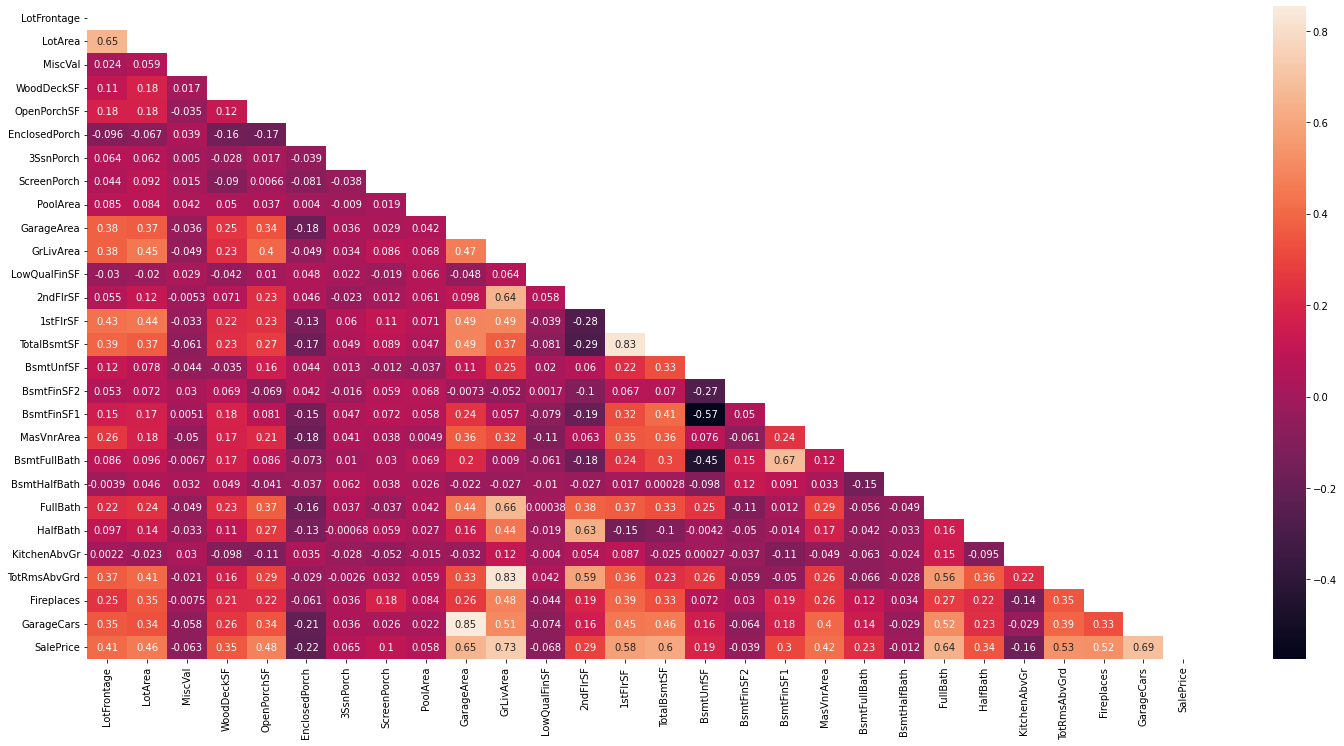

In [22]:
cuantitative_data = train[cuantitative]
correlation = cuantitative_data.corr(method = 'spearman')
plt.figure(figsize=(25,12))
matrix = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=matrix)
plt.show()

del correlation, cuantitative_data, matrix

In [23]:
important_correlations = []
corr = train[cuantitative].corr(method='spearman')

for start, h1 in enumerate(cuantitative):
    for h2 in cuantitative[start + 1:]:
        if abs(corr[h1][h2]) > 0.5:
            important_correlations.append((h1, h2, corr[h1][h2]))


data = pd.DataFrame(important_correlations, columns=("Variable1", "Variable2", "Correlación"))
data_f = data.style.set_properties(**{'text-align': 'center'}) 
display(data_f)

del start, h1, h2, corr, data, data_f

,Variable1,Variable2,Correlación
0,LotFrontage,LotArea,0.649633
1,GarageArea,GarageCars,0.853317
2,GarageArea,SalePrice,0.649379
3,GrLivArea,2ndFlrSF,0.642857
4,GrLivArea,FullBath,0.658419
5,GrLivArea,TotRmsAbvGrd,0.827874
6,GrLivArea,GarageCars,0.505094
7,GrLivArea,SalePrice,0.731310
8,2ndFlrSF,HalfBath,0.625272
9,2ndFlrSF,TotRmsAbvGrd,0.587189


Como se puede observar, existen únicamente 10 variables que poseen una correlación por encima de 0.5 con SalePrice. Estas variables son las que se utilizarán más adelante debido a que son las que poseen una mayor relación con el precio, por lo que servirán para encontrar información valiosa.

## Análisis de los Grupos
Para el análisis de grupos, se optó por utilizar k-means, siguiendo un proceso de clustering desde analizar cuántos grupos deben de realizarle hasta la evaluación de la calidad del agrupamiento.
**HECHO EN R**

## Creación de la Variable de respuesta para el árbol de Clasificación
Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados.

Para la creación de la nueva variable la cual permite categorizar los precios de las casas entre **económicas, intermedias o caras** se utilizó como criterio principal el análisis de grupos realiado en el apartado anterior. 

Como se puede observar, en cada uno de los grupos realizados se encuentran casas en un rango distinto de precios, en el método de la silueta para analizar la calidad del cluster también se puede notar que ningún dato fue agrupado de manera errónea. Con base a este agrupamiento entonces se puede afirmar:
Se uso como base para establecer los límites de los grupos. Ya que como no existen casas de todos los precios en el rango, los percios máximos en cada grupos permitieron establecer los límites inferiores del grupo siguiente.
- Las casa económicas tienen un rango de precios de: 34900 - 171500; representa por medio de 0 
- Las casa intermedias tienene un rango de precios de: 171501 - 295500; se representa por medio de 1
- Las casas caras tienen un rango de precios de: 295501 - 755000; se representa por medio de 2

In [24]:
# Agregando la nueva variable al data frame
conditions = [
    (train['SalePrice'] <= 171500),
    (train['SalePrice'] > 171500) & (train['SalePrice'] <= 295500),
    (train['SalePrice'] > 295500) 
    ]

values = [1, 2, 3]

train['HouseCategory'] = np.select(conditions, values)
del values, conditions


## Datos de Entrenamiento y Prueba. 
Divida el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba. Describa el criterio que usó para crear los conjuntos: número de filas de cada uno, estratificado o no, balanceado o no, etc. Si le proveen un conjunto de datos de prueba y tiene suficientes datos, tómelo como de validación, pero haga sus propios conjuntos de prueba.

Dentro de los datos con los que se cuenta para analizar, en cada una de las categorías se tiene la siguiente cantidad:
- 418 casas son económicas
- 671 casas con caras
- 106 casas con intermedias

Como se puede observar, si bien entre los grupos de tipos de casas existe cierta diferencia entre la cantidad de datos de cada tipo, estas diferencias no son significativas como para poder afectar el modelo o las predicciones, ya que la cantidad de cada una de las categorías son centenas es decir la cantidad de digitos no es mayor a 3. 

Sim emabargo, a pesar de que no hay un desbalance significativo sí se busca garantizar que exista el mismo porcentaje de cada clasificación de los precios de las casas tanto en el entrenamiento con en el test, es por ella que se opta por utilizar muestreo estratificado.


In [25]:
# usable = ['FullBath', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea', '1stFlrSF', 'GarageCars', 'GarageArea', 'SalePrice', 'HouseCategory']
# NO EJECUTAR MÁS DE UNA VEZ
# cuantitative.append('HouseCategory')


In [26]:
# Seleccionando solo las variables cuantitativas
select_train = train[cuantitative]

In [27]:
# Asegurando que no existan valores nan o inf
select_train = select_train[~select_train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [30]:
# Making the train and test arrays to work with
# Variables para clasificar
target = select_train.HouseCategory
predictors = select_train.loc[:, select_train.columns != 'HouseCategory']

# Variables para predecir
target_rg = select_train.SalePrice
predictors_regression = predictors.loc[:, predictors.columns != 'SalePrice']

In [31]:
# stratified sample
# Deberíamos de quedarnos solo con las categorías completas en las variables cuantitative... maybe
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3)
predictorsrg_train, predictorsrg_test, targetrg_train, targetrg_test = train_test_split(predictors_regression, target_rg, test_size=0.3)
# X_train, X_test, Y_train, Y_test

## Árbol de Clasificación
Elabore  el  árbol  de  clasificación  utilizando  el  conjunto  de  entrenamiento  y  la  variable respuesta que creó en el punto 4.  Explique los resultados a los que llega. Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos 
de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [32]:
model = DecisionTreeClassifier(random_state=42) 
model = model.fit(X=predictors_train, y=target_train) 

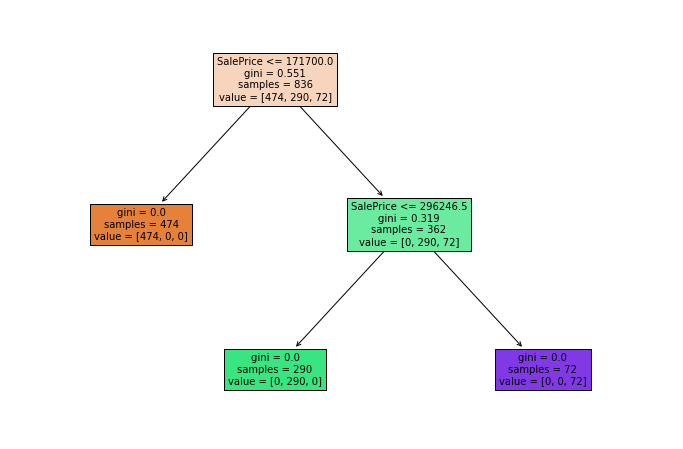

In [33]:
# Representación gráfica del modelo
plt.figure(figsize=(12, 8))
plot_tree(decision_tree=model,feature_names=predictors.columns, filled=True, fontsize=10);


Como se puede observar en el gráfico anterior, la división más influyente tomada por el árbol de desición fue las casas con precios menores o iguales a 172000, el cula era el límite inferior de las casas clasificadas como caras. Esta decisión del algoritmo se pudo originar debido a que son la casas que más frecuencia presentan en los datos. Si bien, como se menciono en el apartado anterior se decidió trabajar con muestreo estratificado, esto no asegura balancear las clases. Por otro lado, en el diagrama también se puede observar que luego de haber separado por el precio más caro, siguió por las del límite inferior de las casas de precio intermedio y finalmente con las casas de precio económico. Teniendo así la clasificación de los 3 tipos de precios de casas descritos.

## Árbol de Regresión
Elabore el árbol de regresión para predecir el precio de las viviendas utilizando el conjunto de entrenamiento.  Explique los resultados a los que llega. Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [34]:
regression_model = DecisionTreeRegressor(max_depth=4, random_state=42)
regression_model = regression_model.fit(X=predictorsrg_train, y=targetrg_train) 

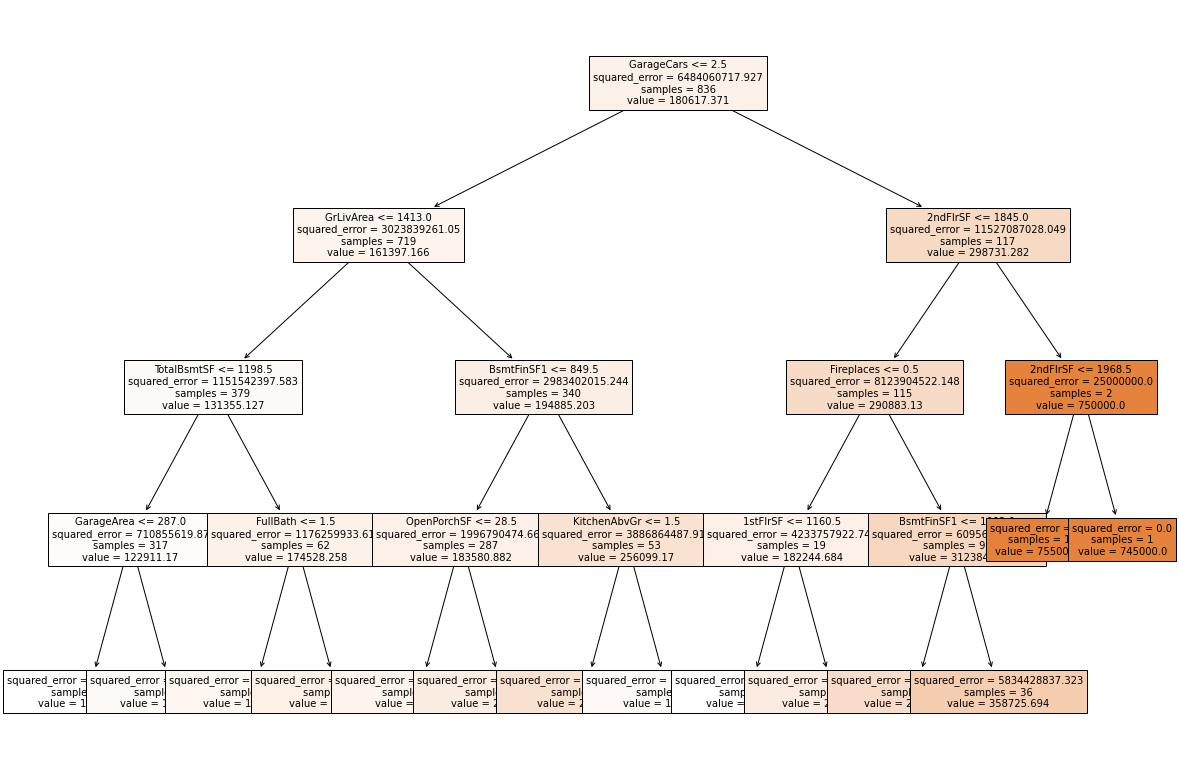

In [35]:
plt.figure(figsize=(20, 14))
plot_tree(decision_tree=regression_model,feature_names=predictors.columns, filled=True, fontsize=10);


En el diagrama anterior se puede notar que la variable más influyente considerada por el algoritmo es la cantidad de carros que caben en el garage. Una de las razones por las cuales pudo considerar esta variable es debido a la alta correlación existente entre la misma y el precio de las casas. Ya que como se pudo observar en el análisis exploratorio y de grupos realizado, la cantidad de carros que caben en el garage tiene aproximadamente una correlación de 0.75 con el precio de la casa. Seguido a esta clasificación el árbol divide las casas por la cantidad de baños que tienen y la cantidad de cuartos de la casa y así continúa. Como se puede observar en los nodos del árbol, las primeras variables que utiliza para la clasificación, son aquellas que se encuentran más correlacionadas con la variable objetivo. 

## Eficiencia

## Clasificar y predecir
Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar y predecir, en dependencia de las características de la variable respuesta. 

### Análisis de eficiencia de árbol de clasificación
Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores

In [36]:
# Evaluando clasificación
target_pred = model.predict(predictors_test)
results = pd.DataFrame({
    'Predicted': target_pred,
    'Real': target_test
})
results

,Predicted,Real
883,1,1
915,1,1
264,1,1
171,2,2
736,1,1
...,...,...
551,1,1
636,1,1
331,1,1
715,1,1


In [37]:
print ("Accuracy:",skm.accuracy_score(target_test, target_pred))
print ("Precision:", skm.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", skm.recall_score(target_test,target_pred,average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall:  1.0


In [38]:
# Confusion Matrix
skm.confusion_matrix(target_test, target_pred)

array([[197,   0,   0],
       [  0, 128,   0],
       [  0,   0,  34]], dtype=int64)

Para poder determinar la eficiencia de la clasificación se utilizó el modelo creado con el árbol de clasificación y se utilizaron las métricas que provee la librería *sklearn* y como se puede observar en el bloque de código anterior, la precisión del modelo para clasificar es de 0.997 al igual que su exactitud. Por lo que se puede decir que con base a las caracterísiticas de la variable respuesta el modelo ha clasificado en promedio un 99% de los datos correctamente.  

Por otro lado, en la matriz de confusión se puede observar como ninguno de los valores fue clasificado de manera incorrecta. Sin embargo, debido a que no se puede asegurar con 100% de certeza que siempre será así, y el modelo no ha adquirido sobreaprendizaje de los datos de entrenamientos es por ello que el valor de exactitud y precisión es muy cercano a 100 pero no es 100.

### Análisis del desempeño del árbol de regresión
Analice el desempeño del árbol de regresión.

In [39]:
# Evaluando la predicción
targetrg_pred = regression_model.predict(predictorsrg_test)

results = pd.DataFrame({
    'Predicted': targetrg_pred,
    'Real': targetrg_test
})
results

,Predicted,Real
74,161513.500000,107400
34,263287.120000,277500
723,161513.500000,135000
205,200851.006211,180500
619,284579.766667,305000
...,...,...
422,131659.204878,113000
1279,131659.204878,68400
530,161513.500000,175000
532,131659.204878,107500


In [40]:
# Variación de los datos reales vs predecidos
print ("Variance Score:",skm.explained_variance_score(targetrg_test, targetrg_pred, multioutput='raw_values'))
print ("Max Error:", skm.mean_absolute_error(targetrg_test, targetrg_pred))

Variance Score: [0.64151735]
Max Error: 35633.88640801402


Para poder  evaluar el desempeño del árbol de regresión se utilizó la variación explicada, la cual explica la variación de un conjunto de datos determinado en este caso, la variación de los datos predichos con respecto a los datos reales. Como se puede observar, esta métrica retorno un valor de 0.62, debido a que se encuentra por encima de 0.5 se puede decir que es una buena métrica sin emabargo, entrenando al modelo con más datos, las predicciones del precio podrían ser mejores.


## Random Forest

In [41]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X=predictors_train, y=target_train)


RandomForestClassifier()

In [43]:
# Evaluando la predicción
targetclf_pred = clf.predict(predictors_test)

results = pd.DataFrame({
    'Predicted': targetclf_pred,
    'Real': target_test
})
results

,Predicted,Real
883,1,1
915,1,1
264,1,1
171,2,2
736,1,1
...,...,...
551,1,1
636,1,1
331,1,1
715,1,1


In [44]:
print ("Accuracy:",metrics.accuracy_score(target_test, targetclf_pred))
print ("Precision:", skm.precision_score(target_test,targetclf_pred,average='weighted') )

Accuracy: 0.9832869080779945
Precision: 0.9840352554774873


In [45]:
# Confusion Matrix
skm.confusion_matrix(target_test, targetclf_pred)

array([[197,   0,   0],
       [  0, 128,   0],
       [  0,   6,  28]], dtype=int64)

Como se puede observar, tanto el random forest como el árbol de clasificación hicieron un predicción bastante certera en cuanto a la clasificación de cada uno de los precios de las casas. Sin embargo, al analizar la matriz de confusión se puede notar como el random forest realizó erróneamente la clasificación de 3 observaciones. De igual forma esto puede observarse en el valor de exactitud obtenido, ya que en el caso de random forest este es de 0.991 y en el caso del árbol de clasificación es de 0.996. Si bien la diferencia no es mucha en cuanto al valor de exactitud, en la matriz de confusión sí se puede observar a qué se debe esta variación.

Por lo tal, en este caso particular se puede afirmar que el algoritmo que mejor clasificación realizó fue el árbol de clasificación.

# Hoja hoja de trabajo 4 - Modelos de regresión lineal

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import normaltest
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm

In [ ]:
# Graficando el precio con el total de habitaciones (?)
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
fig = plt.figure()
plt.scatter(train['SalePrice'],train['TotRmsAbvGrd'])
plt.xlabel("SalePrice")
plt.ylabel("TotRmsAbvGrd")
plt.title("SalePrice vs TotRmsAbvGrd")
#train["SalePrice"]

#### Haciendo la regresión lineal

In [112]:
p_length = targetrg_train.values.reshape(-1,1)
p_length_t = targetrg_test.values.reshape(-1,1)
p_width = predictorsrg_train['TotRmsAbvGrd'].values.reshape(-1,1)
p_width_t = predictorsrg_test['TotRmsAbvGrd'].values.reshape(-1,1)
lm = LinearRegression(normalize=True)
lm.fit(p_width, p_length)
p_length_pred = lm.predict(p_width_t)

In [108]:
# Haciendo la ecuación
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'$SalePrice = %0.4f*TotRmsAbvGrd %+0.4f$'%(m,c)
print(label)

$SalePrice = 24940.5918*TotRmsAbvGrd +16534.5299$


Text(0.5, 1.0, 'Test SalePrice vs TotRmsAbvGrd')

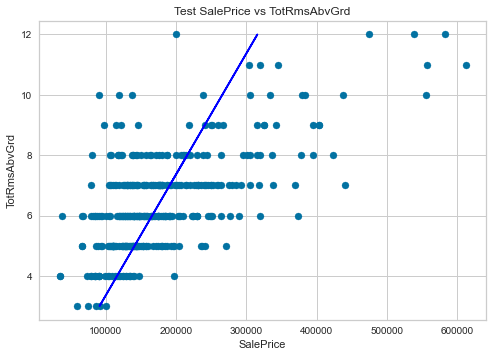

In [109]:
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("TotRmsAbvGrd")
plt.title("Test SalePrice vs TotRmsAbvGrd")

In [96]:
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 5035185704.31
R squared: 0.36


### Analizando residuales

In [97]:
residuales = p_length_t - p_length_pred
len(residuales)

359

Text(0, 0.5, 'Residuales')

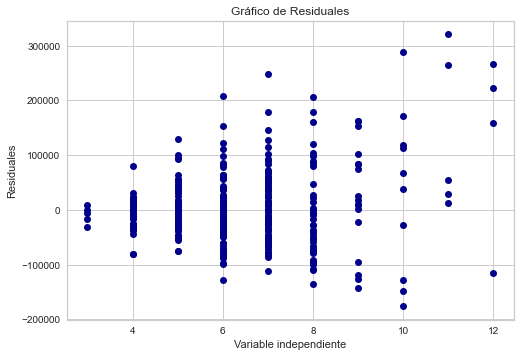

In [98]:
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

C:\Users\Orlando\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuales')

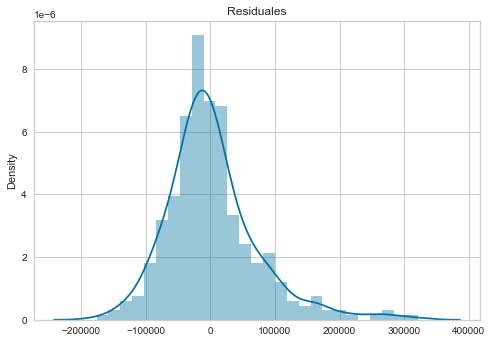

In [99]:
sns.distplot(residuales)
plt.title("Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x14009040>,
 'caps': [<matplotlib.lines.Line2D at 0x14009310>,
 'boxes': [<matplotlib.lines.Line2D at 0x13efd598>],
 'medians': [<matplotlib.lines.Line2D at 0x140095e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14009748>],
 'means': []}

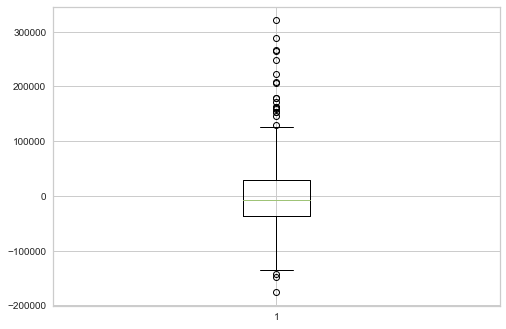

In [100]:
plt.boxplot(residuales)

In [101]:
normaltest(residuales)

NormaltestResult(statistic=array([84.62848635]), pvalue=array([4.19911418e-19]))

0.3631572034100339

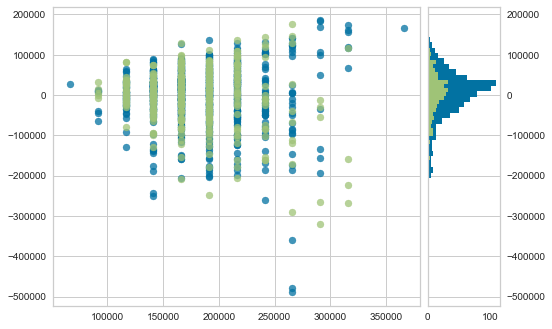

In [102]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)

In [103]:
est = sm.OLS(p_length,p_width)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              5860.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        17:36:06   Log-Likelihood:                         -10511.
No. Observations:                 836   AIC:                                  2.102e+04
Df Residuals:                     835   BIC:                                  2.103e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------